In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Uploading the train and test datasets**

In [2]:
train=pd.read_csv('https://raw.githubusercontent.com/KanchanRana/LoanPrediction/main/train.csv')
print(train.columns)
train_original=train.copy()
test=pd.read_csv('https://raw.githubusercontent.com/KanchanRana/LoanPrediction/main/test.csv')
print(test.columns)
test_original=test.copy()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


**Plotting the loan_status(target variable) bar graph**

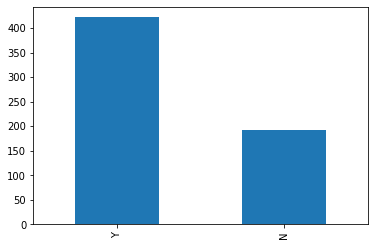

In [3]:
train['Loan_Status'].value_counts(normalize='True')
train['Loan_Status'].value_counts().plot.bar()

**Independent Variable( categorical) - bar graph visualisation**

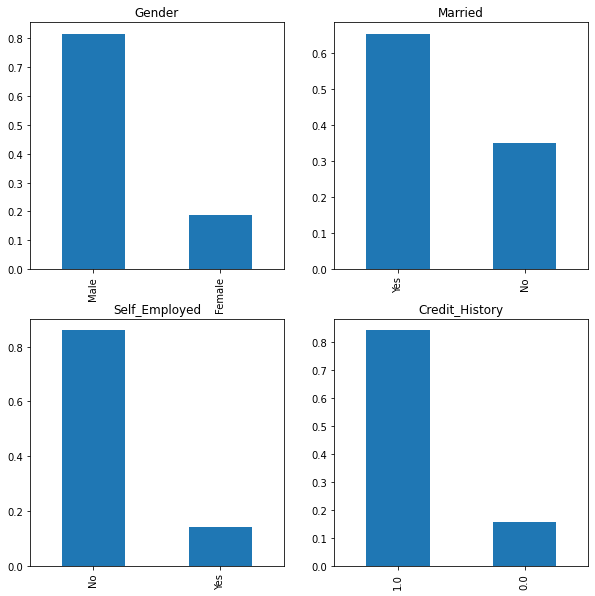

In [4]:
#independent variable(categorical)
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize='True').plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize='True').plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize='True').plot.bar(title='Credit_History')
plt.show()

Independent Variable( ordinal) - bar graph visualisation

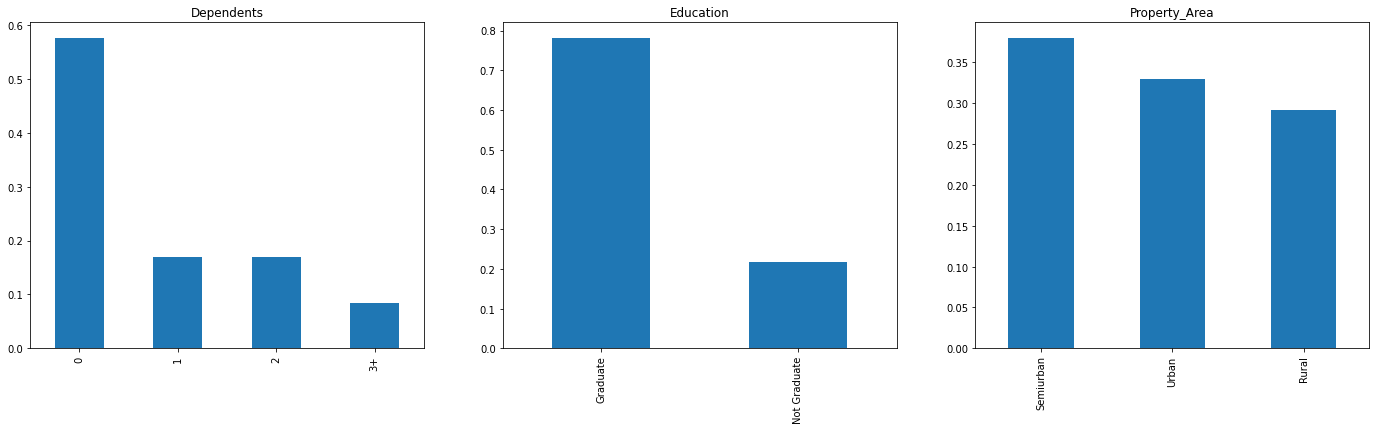

In [5]:
#independent variable (ordinal)
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize='True').plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize='True').plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize='True').plot.bar(title='Property_Area')

plt.show()

**Independent Variable(numerical) - density visualisation**



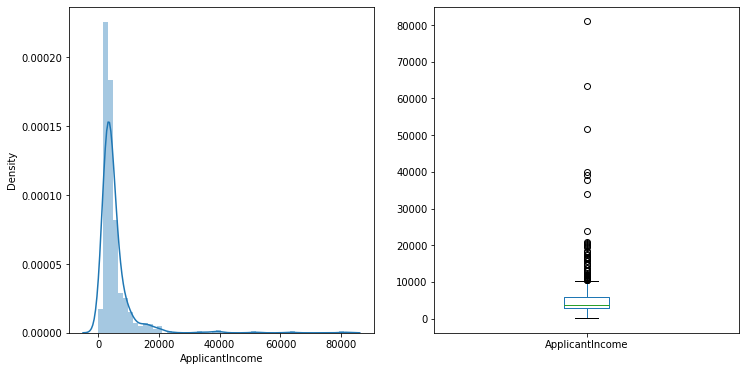

Text(0.5, 0.98, '')

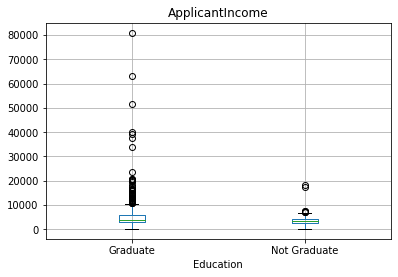

In [6]:
#independent variable (numerical)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(12,6))
plt.show()
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

**Density visualisation of Coapplicant Income and Loan Amount**

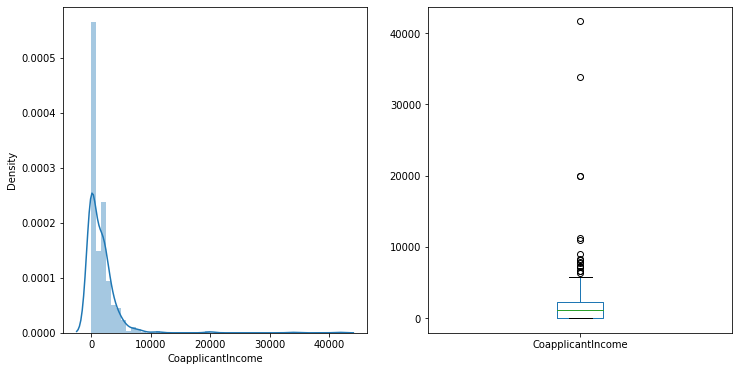

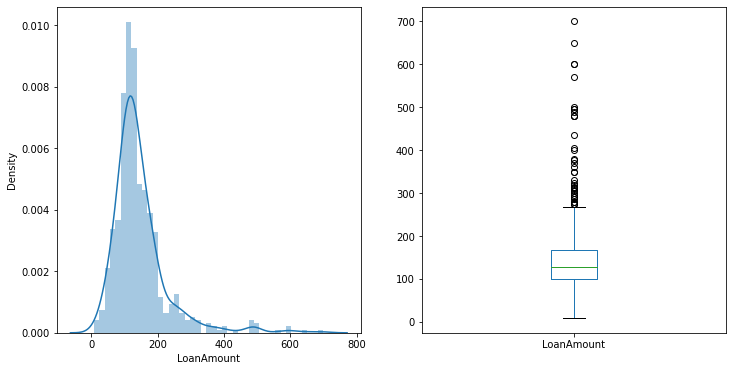

In [7]:
#Observing Coapplicant Income
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(12,6))
plt.show()

#Observing Loan Amount
plt.figure(2)
plt.subplot(121)
df=train.dropna()#drop the row which has any null value
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(12,6))
plt.show()

**Plotting the bar graph of independent variable(categorical) vs loan_status(target_variable)**

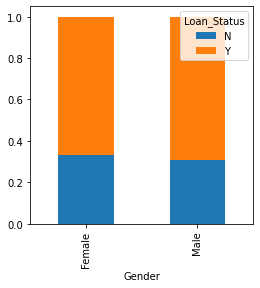

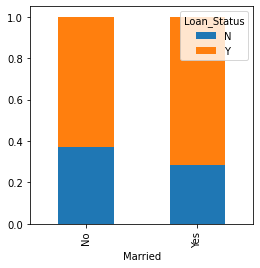

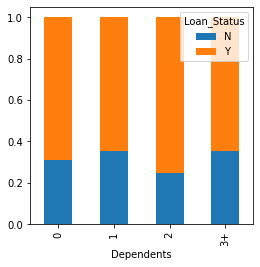

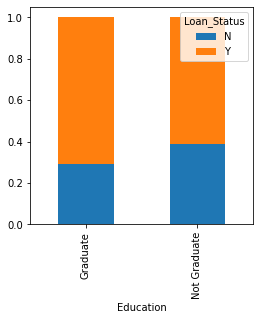

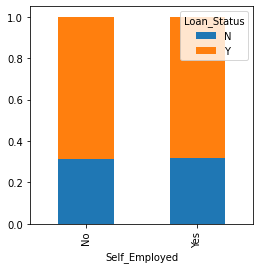

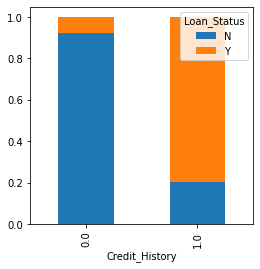

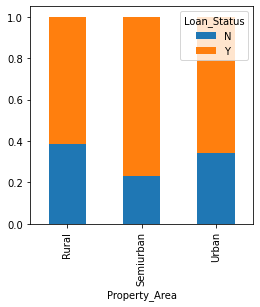

In [8]:
#categorical independent variables vs target variable
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

**Plotting the bar graph of independent variable(numerical) vs loan_status(target_variable)**

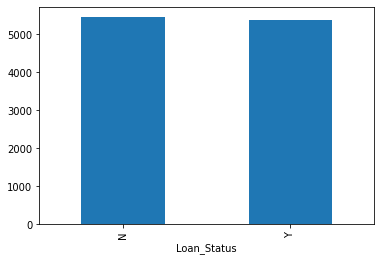

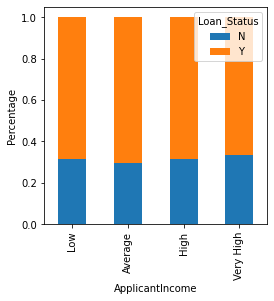

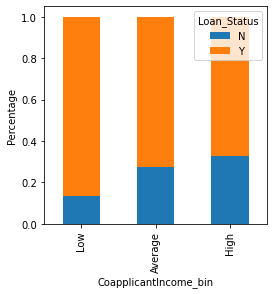

In [9]:
#numerical independent variables vs target variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()#y axis = mean applicant income
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

bins=[0,1000,3000,42000] 
group=['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
CoapplicantIncome_bin=pd.crosstab(train['CoapplicantIncome_bin'],train['Loan_Status'])
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel('CoapplicantIncome_bin')
P=plt.ylabel('Percentage')

**Plotting the bar graph of** 
1.   total income(coapplicant +applicant income) vs loan_status(target_variable)
2.   loan amount vs loan_status(target_variable)

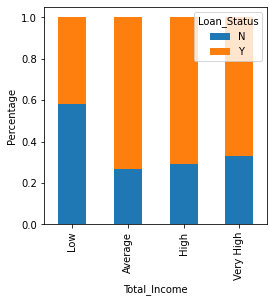

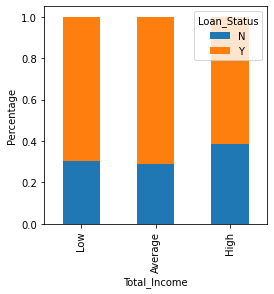

In [10]:
#combine ApplicantIncome and CoapplicantIncome
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

#loan amount vs target variable
bins=[0,100,200,700] 
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')


**Dropping self made columns and replacing the values of dependent and loan status attributes and showing correlation of all the attributes of train dataset**

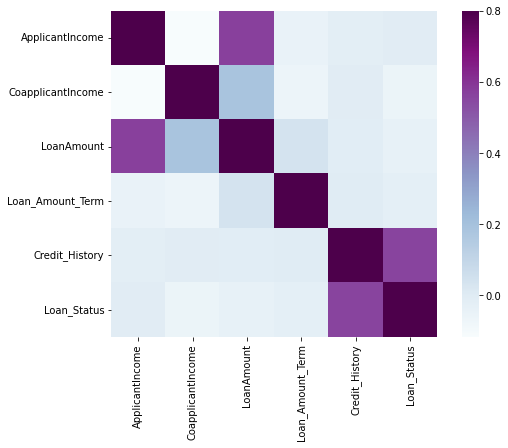

In [11]:
train=train.drop(['Income_bin','CoapplicantIncome_bin','Total_Income_bin','Total_Income','LoanAmount_bin'],axis=1)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
matrix=train.corr() 
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")

**Missing value and outliers treatment**

In [12]:
#train data set
print("Null value for train data : ",train.isnull().sum())
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Loan_Amount_Term'].value_counts()
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
print("Null value for train data : ",train.isnull().sum())
#test data set
print("Null value for test data : ",test.isnull().sum())
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
print("Null value for test data : ",test.isnull().sum())

Null value for train data :  Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Null value for train data :  Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Null value for test data :  Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area

**Visualisation of LoanAmount**

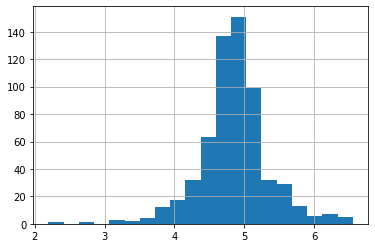

In [13]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])


**Dropping the Loan_Id attribute**

In [14]:
train=train.drop('Loan_ID',axis=1)
test=test.drop(['Loan_ID'],axis=1)
X=train.drop('Loan_Status',1)
y=train.Loan_Status

**Creating Dummy Variables**

In [15]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

**Splitting of train dataset into training set (x_train and y_train) and test set( x_test and y_test)**

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

**Build a simple Decision Tree classifier**

In [17]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train, y_train)
print(dt_clf.score(x_test, y_test))
y_pred_dt=dt_clf.predict(x_test)




0.8108108108108109


**Build a Naive Bayes Classifier**

In [18]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(x_train,y_train)
print(nb_clf.score(x_test,y_test))
y_pred_nb=nb_clf.predict(x_test)


0.8162162162162162


**Build a K-Nearest Neighbor Classifier**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=19)
knn_clf.fit(x_train,y_train)
print(knn_clf.score(x_test,y_test))
y_pred_knn=knn_clf.predict(x_test)


0.7351351351351352


**Confusion Matrix**

In [20]:
from sklearn.metrics import confusion_matrix
print("Decision Tree Confusion Matrix : ",confusion_matrix(y_test,y_pred_dt))
print("Naive Bayes Confusion Matrix : ",confusion_matrix(y_test,y_pred_nb))
print("kNearest Neighbors Confusion Matrix : ",confusion_matrix(y_test, y_pred_knn))

Decision Tree Confusion Matrix :  [[ 17  28]
 [  7 133]]
Naive Bayes Confusion Matrix :  [[ 18  27]
 [  7 133]]
kNearest Neighbors Confusion Matrix :  [[  4  41]
 [  8 132]]


**Accuracy Score**

In [21]:
from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy Score : ",accuracy_score(y_test, y_pred_dt))
print("Naive Bayes Accuracy Score : ",accuracy_score(y_test, y_pred_nb))
print("kNearest Neighbors Accuracy Score : ",accuracy_score(y_test, y_pred_knn))

Decision Tree Accuracy Score :  0.8108108108108109
Naive Bayes Accuracy Score :  0.8162162162162162
kNearest Neighbors Accuracy Score :  0.7351351351351352


**Prediction Probabilites**

In [22]:
r_probs=[0 for _ in range(len(y_test))]
dt_probs=dt_clf.predict_proba(x_test)
nb_probs=nb_clf.predict_proba(x_test)
knn_probs=knn_clf.predict_proba(x_test)

Probabilities for the positive(1 i.e Yes) outcome is kept

In [23]:
dt_probs=dt_probs[:,1]
nb_probs=nb_probs[:,1]
knn_probs=knn_probs[:,1]

**Compute the AUROC values**

In [24]:
from sklearn.metrics import roc_auc_score
r_auc=roc_auc_score(y_test,r_probs)
dt_auc=roc_auc_score(y_test,dt_probs)
nb_auc=roc_auc_score(y_test,nb_probs)
knn_auc=roc_auc_score(y_test,knn_probs)

**Display the AUROC Scores**

In [25]:
print("Random Prediction : AUROC = ",r_auc)
print("Decision Tree Prediction : AUROC = ",dt_auc)
print("Naive Bayes Prediction : AUROC = ",nb_auc)
print("kNearest Neighbors Prediction : AUROC = ",knn_auc)


Random Prediction : AUROC =  0.5
Decision Tree Prediction : AUROC =  0.714047619047619
Naive Bayes Prediction : AUROC =  0.6719047619047619
kNearest Neighbors Prediction : AUROC =  0.5406349206349206


**Calculate ROC Curve**

In [26]:
from sklearn.metrics import roc_curve
r_fpr , r_tpr , _ = roc_curve(y_test,r_probs)
dt_fpr ,dt_tpr, _ = roc_curve(y_test,dt_probs)
nb_fpr ,nb_tpr, _ = roc_curve(y_test,nb_probs)
knn_fpr,knn_tpr,_ = roc_curve(y_test,knn_probs)

**Plot the ROC Curve**

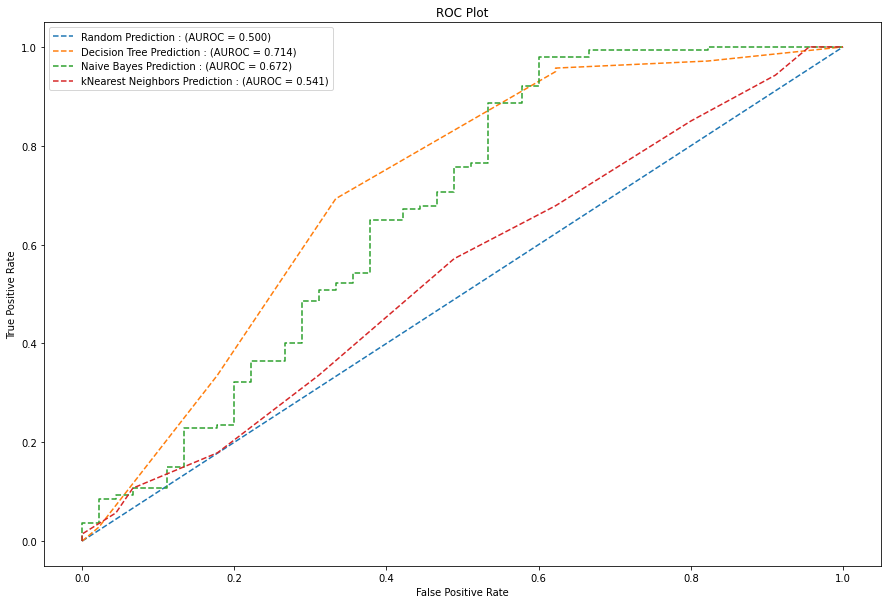

In [27]:
plt.figure(figsize=(15,10))
plt.plot(r_fpr,r_tpr,linestyle='--', label='Random Prediction : (AUROC = %0.3f)'%r_auc)
plt.plot(dt_fpr ,dt_tpr,linestyle='--', label='Decision Tree Prediction : (AUROC = %0.3f)'%dt_auc)
plt.plot(nb_fpr,nb_tpr,linestyle='--', label='Naive Bayes Prediction : (AUROC = %0.3f)'%nb_auc)
plt.plot(knn_fpr,knn_tpr,linestyle='--', label='kNearest Neighbors Prediction : (AUROC = %0.3f)'%knn_auc)

#Title
plt.title('ROC Plot')

#Axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#show legend
plt.legend()
plt.show()

**Creating Output files which contain loan_id and loan_status for each classifiers.**
**Also adding loan_status attributes by each classifiers into test dataset**

In [28]:
#Decision Tree Classifier
pred_test_dt=dt_clf.predict(test)
test_original['Loan_Status_by_Decision_Tree']=pred_test_dt
test_original['Loan_Status_by_Decision_Tree'].replace(0,'N',inplace=True)
test_original['Loan_Status_by_Decision_Tree'].replace(1,'Y',inplace=True)
pd.DataFrame(test_original,columns=['Loan_ID','Loan_Status_by_Decision_Tree']).to_csv('decision_tree.csv')

#Naive Bayes Classifier
pred_test_nb=nb_clf.predict(test)
test_original['Loan_Status_by_Naive_Bayes']=pred_test_nb
test_original['Loan_Status_by_Naive_Bayes'].replace(0,'N',inplace=True)
test_original['Loan_Status_by_Naive_Bayes'].replace(1,'Y',inplace=True)
pd.DataFrame(test_original,columns=['Loan_ID','Loan_Status_by_Naive_Bayes']).to_csv('naive_bayes.csv')

# K Nearest Neighbors Classifier
pred_test_knn=knn_clf.predict(test)
test_original['Loan_Status_by_KNN']=pred_test_nb
test_original['Loan_Status_by_KNN'].replace(0,'N',inplace=True)
test_original['Loan_Status_by_KNN'].replace(1,'Y',inplace=True)
pd.DataFrame(test_original,columns=['Loan_ID','Loan_Status_by_KNN']).to_csv('knn.csv')